# Assignment 1

Team Members:
- Abhinav Tyagi (2020A7PS2043H)
- Rishiraj Datta (2020A7PS2075H)
- Ritvik (2020A7PS1723H)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# For 1A
from scipy.stats import beta

## Assignment 1-A Prior and Posterior Distributions

### Problem Statement
A survey of whether a customer likes the new update of the software or not was done by a company. Let s denote the probability of a customer liking the new update. Before the survey it was assumed that s follows a beta distribution with parameters α,β = (2,2). Out of the 50 customers surveyed, 40 of them liked the update. Plot the prior and posterior probability distribution of s. After few days another survey is conducted in which out of the 30 customers surveyed 17 of them disliked the update. Plot distribution of s after this survey. What is the prior distribution in this case and justify it with appropriate reasoning. Again, a final survey was conducted in which 70 out of the 100 people surveyed liked the update. Plot distribution of s after the final survey. 

In [2]:
def plot_beta_distribution(a, b, str):

    """
        Plots the beta distribution for given parameters a and b:
        Args: (int)a -> Parameter a, 
              (int)b -> Paramter b, 
              (string)str -> Title of the distribution

        Returns: (void) Prints a curve depicting beta distribution

    """

    x = np.linspace(0, 1, 200)
    y = beta.pdf(x, a, b)

    plt.plot(x, y)

    plt.xlabel("x")
    plt.ylabel("y-probability density")

    max_ind = np.argmax(y)

    plt.plot(x[max_ind], y[max_ind], marker='o')
    plt.annotate(f"({x[max_ind]:.03f}, {y[max_ind]:.03f})", (x[max_ind], y[max_ind]))
    
    plt.title(str)
    plt.show()

The distribution of the probability of a customer liking the new update is:


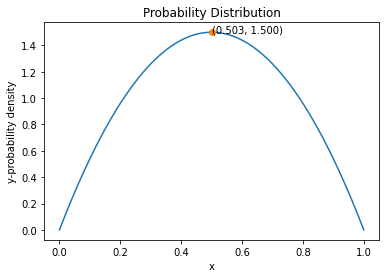

The distribution of probability of a customer liking the new update after the first survey is:


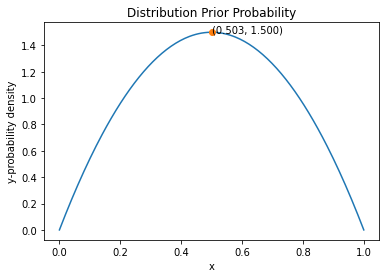

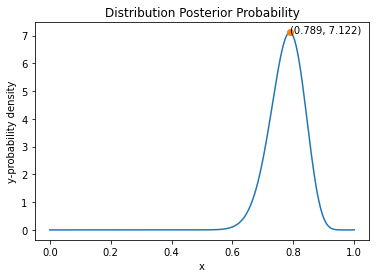

The distribution of probability of a customer liking the new update after the second survey is:


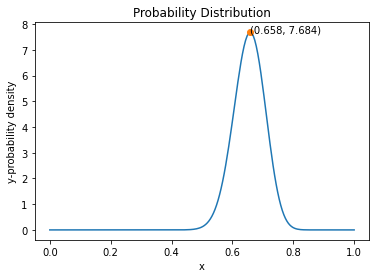

The distribution of probability of a customer liking the new update after the final survey is:


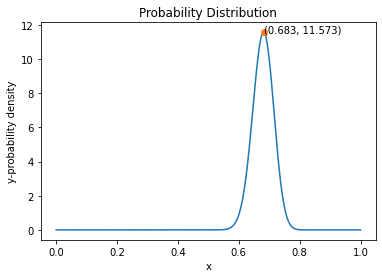

In [3]:
"""
    a -> Number of People who liked the new software update.
    b -> Number of People who disliked the new software update.

"""
print("The distribution of the probability of a customer liking the new update is:")

a = 2
b = 2

plot_beta_distribution(a, b, "Probability Distribution")

print("The distribution of probability of a customer liking the new update after the first survey is:")
plot_beta_distribution(a, b, "Distribution Prior Probability")

a = 42
b = 12

plot_beta_distribution(a, b, "Distribution Posterior Probability")

print("The distribution of probability of a customer liking the new update after the second survey is:")

a = 55
b = 29

plot_beta_distribution(a, b, "Probability Distribution")

print("The distribution of probability of a customer liking the new update after the final survey is:")

a = 125
b = 59

plot_beta_distribution(a, b, "Probability Distribution")

## Assignment 1-B Polynomial Regression and Regularization

### Problem Statement
• Aquatic toxicity caused due to manufactured chemicals and other anthropogenic and 
natural materials severely affects aquatic organisms at various levels of organization.
The dataset consists of 2 molecular descriptors: MLOGP and GATS1i which affect the 
LC50 value (quantitative experimental response). 

• Dataset:
Link: https://drive.google.com/file/d/1nfA1Qet7qOR46tWCGnFR2oHwzWSV-0nO/view?usp=sharing

A. 
Develop a polynomial regression model (with degrees varying from 0
1, 2,. ., 9) to predict LC50 value based on the two molecular descriptors using Gradient 
Descent and Stochastic Gradient Descent methods. Before applying the model, shuffle 
the data and create a random 80-20 split to aid in training and testing. Determine the 
degree of the polynomial which best fits the given dataset.

In [4]:
df = pd.read_csv("fods_1.csv")
df.head()

,MLOGP,RDCHI,quantitative response of LC50
0,2.419,1.225,3.740
1,2.638,1.401,4.330
2,5.799,2.930,7.019
3,5.453,2.887,6.723
4,4.068,2.758,5.979


In [5]:
training_df = df.sample(frac=0.8, random_state=25)
testing_df = df[~df.index.isin(training_df.index)]

In [6]:
training_df.head()

,MLOGP,RDCHI,quantitative response of LC50
6,2.723,2.321,7.337
47,-0.317,1.155,0.550
340,4.789,3.580,5.512
490,-0.317,1.225,0.495
279,2.876,1.857,3.918


In [7]:
testing_df.head()

,MLOGP,RDCHI,quantitative response of LC50
2,5.799,2.930,7.019
5,0.189,4.677,6.064
14,4.275,4.174,4.112
17,4.579,3.875,7.693
22,1.406,3.511,2.593


In [8]:
training_data = np.array(training_df.values, 'float')
testing_data = np.array(testing_df.values, 'float')

In [9]:
training_x1 = training_data[:,0]
training_x2 = training_data[:,1]
training_t = training_data[:,2]

In [10]:
testing_x1 = testing_data[:,0]
testing_x2 = testing_data[:,1]
testing_t = testing_data[:,2]

In [11]:
min_max = np.zeros([55, 2], dtype=float)

def get_min_max(x):
    min_max[0][0] = 0
    min_max[0][1] = 1

    for i in range(1, 55):
        min_max[i][0] = min(x[:,i])
        min_max[i][1] = max(x[:,i])

def normalize_datapoints(x, n, ind):
    x_normalized = np.zeros(n, dtype=float)

    for i in range(n) :
        x_normalized[i] = (x[i] - min_max[ind][0])/(min_max[ind][1] - min_max[ind][0])

    return x_normalized

def denormalize_datapoints(x, n, ind):
    x_denormalized = np.zeros(n, dtype=float)

    for i in range(n) :
        x_denormalized[i] = (x[i])*(min_max[ind][1] - min_max[ind][0]) + min_max[ind][0]
    
    return x_denormalized

In [12]:
training_x_comb = np.zeros([training_t.size, 55], dtype=float)

for i in range(training_t.size):
    for d in range(10):
        for exp in range(d+1):
            training_x_comb[i][((d*(d+1))//2) + exp] = (training_x2[i] ** exp) * (training_x1[i] ** (d - exp))

In [13]:
testing_x_comb = np.zeros([testing_t.size, 55], dtype=float)

for i in range(testing_t.size):
    for d in range(10):
        for exp in range(d+1):
            testing_x_comb[i][((d*(d+1))//2) + exp] = (testing_x2[i] ** exp) * (testing_x1[i] ** (d - exp))

In [14]:
get_min_max(training_x_comb)

for i in range(55):
    training_x_comb[:,i] = normalize_datapoints(training_x_comb[:,i], training_t.size, i)
    testing_x_comb[:,i] = normalize_datapoints(testing_x_comb[:,i], testing_t.size, i)

In [15]:
w_models_gradient = np.zeros([10, 55], dtype=float)
w_models_stochastic = np.zeros([10, 55], dtype=float)
learning_rate = 0.001

In [16]:
# Gradient Descent
N = training_t.size

for degree in range(10):
    print(degree)
    ind = ((degree+1)*(degree+2))//2

    for iteration in range(500000):
        y_pred = np.dot(training_x_comb[:,:ind], np.transpose(w_models_gradient[degree][:ind]))
        der = np.dot(np.transpose(training_x_comb[:,:ind]), y_pred - training_t)
        w_models_gradient[degree][:ind] = np.transpose(np.transpose(w_models_gradient[degree][:ind]) - ((learning_rate))*(der))

    print(w_models_gradient[degree][:ind])

0
[4.61702059]
1
[-0.08197052  7.12965876  2.62499727]
2
[ 0.42613813  7.18227687  9.23120851  1.48090943 -2.96246681 -8.04586072]
3
[  0.42457759  -0.14529187  12.68372301   7.715303    12.82607944
 -19.98043849  -3.09023491  -7.19990468  -5.95002199   9.17116917]
4
[  0.62624759   2.68760182  12.26999236   1.10195589   1.76849108
 -14.44172806   3.1186192    5.46686939  11.05953106  -5.43137405
   5.20597789 -13.7165291   -8.01346903  -4.74303449   9.6800881 ]
5
[  0.48885967   4.99503208  11.76456092   1.1651001   -4.79982492
 -12.76777166  -4.16207332   2.49310841  12.01663041  -5.35213553
   7.29203408  -7.37062357   4.56799882   9.36936576   3.17332284
  18.78507299 -16.73638585 -10.73041846  -0.98095364 -11.78095802
   5.38967759]
6
[  0.56176388   6.16704867  12.67098117   3.47026626  -9.26688885
 -14.82891088  -6.20875602  -0.51742541   9.99139646  -4.97507342
   1.39887484  -5.99543613   4.86483887  15.43122418   4.76551832
  16.25565796 -13.04311818  -4.8079848    5.03183503

In [17]:
# Stochastic Gradient Descent
for degree in range(10):
    ind = ((degree+1)*(degree+2))//2
    for iteration in range(100000):
        value_ind = np.random.randint(training_t.size)
        
        y_pred = np.dot(training_x_comb[value_ind][:ind], np.transpose(w_models_stochastic[degree][:ind]))
        der = np.dot(np.transpose(training_x_comb[value_ind][:ind]), y_pred - training_t[value_ind])
        w_models_stochastic[degree][:ind] = np.transpose(np.transpose(w_models_stochastic[degree][:ind]) - (learning_rate)*(der))

for degree in range(10):
    ind = ((degree+1)*(degree+2))//2
    print(degree)
    print(w_models_stochastic[degree][:ind])

0
[4.65731332]
1
[1.02782255 5.05206006 2.80357514]
2
[1.05238436 3.53049663 1.72699853 2.04864941 1.96690265 0.39542734]
3
[ 0.80303551  3.25101643  1.78484738  1.78585653  1.68115101  0.42505267
  0.63020981  0.4566049   0.74609591 -0.35721031]
4
[ 0.82926352  3.28101704  1.92690312  1.7990443   1.67455867  0.5365009
  0.59168162  0.44027943  0.71581844 -0.27194927 -0.21129152  0.00760312
 -0.27171441  0.13695512 -0.6336948 ]
5
[ 0.82244994  3.28394493  1.99908642  1.88460221  1.69094057  0.64164279
  0.61161731  0.50846895  0.73846233 -0.15858365 -0.16982919  0.02438689
 -0.21361225  0.16292311 -0.52502879 -0.31507138 -0.58528156 -0.31251403
 -0.59302776 -0.1969485  -0.65112395]
6
[ 0.84228245  3.23252957  2.0192208   1.96700609  1.72260313  0.70389802
  0.71958669  0.64920154  0.8169184  -0.06553559  0.00956203  0.15969835
 -0.04361295  0.27052657 -0.41544966 -0.15160807 -0.39200918 -0.16075811
 -0.40801514 -0.06955226 -0.53543732 -0.51037656 -0.38225894 -0.59459881
 -0.3507304  -0

In [44]:
testing_x1_x2 = np.dstack(np.meshgrid(testing_x_comb[:,1], testing_x_comb[:,2])).reshape(-1, 2)

testing_x1_x2_comb = np.zeros([testing_x1_x2.size//2, 55], dtype=float)

for i in range(testing_x1_x2.size//2):
    for d in range(10):
        for exp in range(d+1):
            testing_x1_x2_comb[i][((d*(d+1))//2) + exp] = (testing_x1_x2[i][0] ** exp) * (testing_x1_x2[i][1] ** (d - exp))

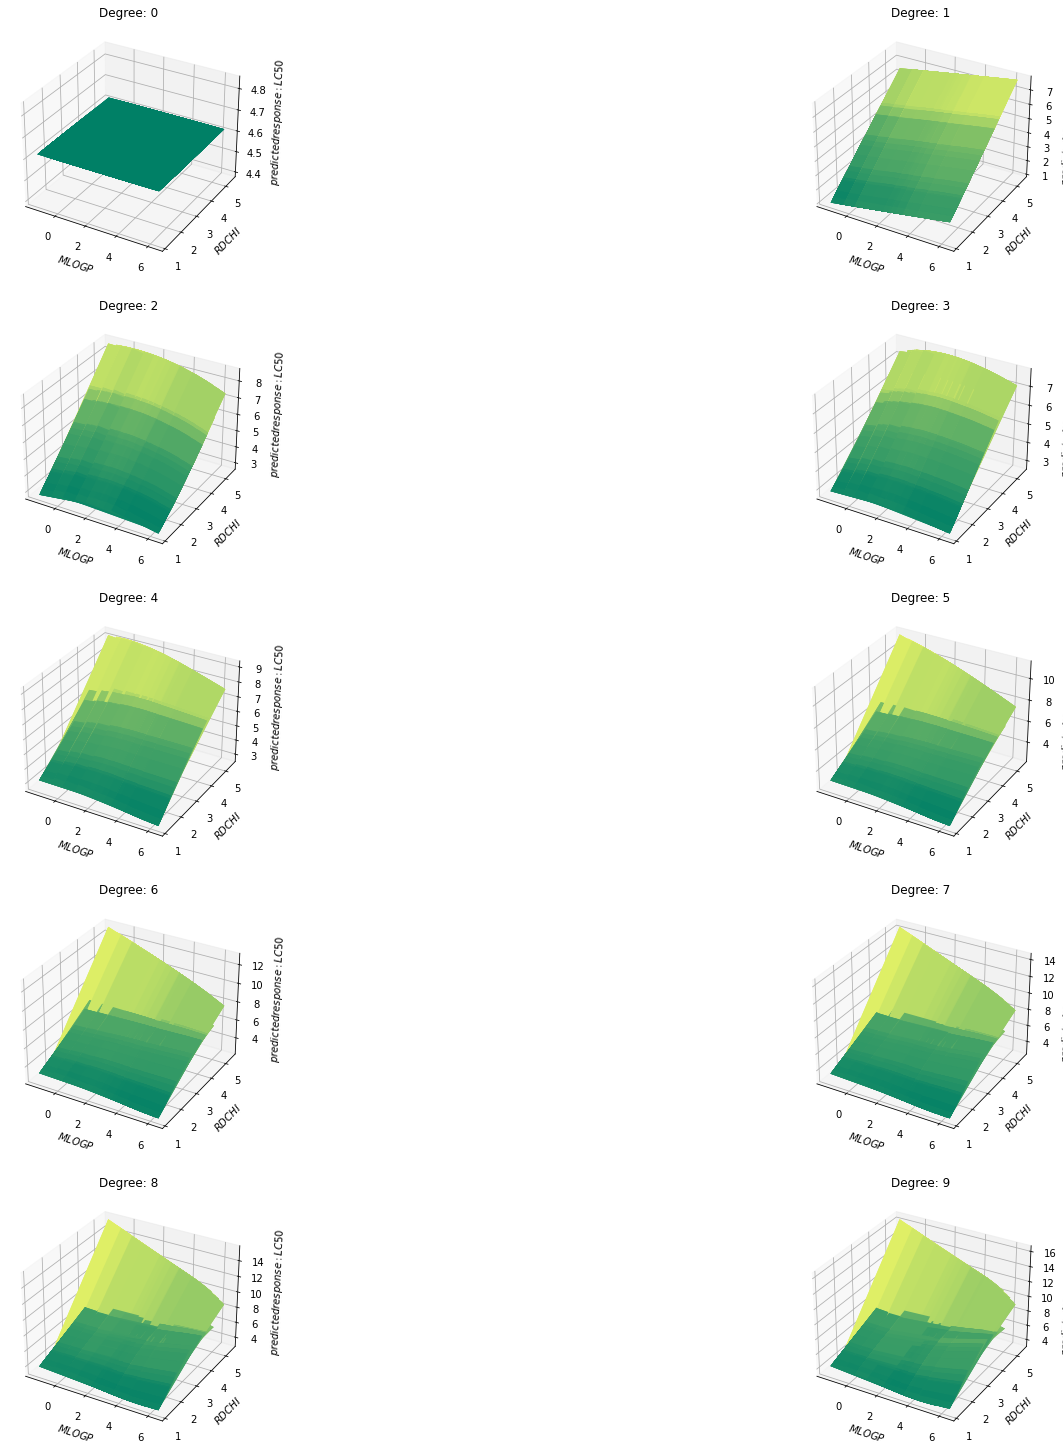

In [45]:
# Gradient Descent Surface Plots
x1 = denormalize_datapoints(testing_x_comb[:,1], testing_t.size, 1)
x2 = denormalize_datapoints(testing_x_comb[:,2], testing_t.size, 2)

X1, X2 = np.meshgrid(x1, x2)

fig = plt.figure(figsize=(26,26))
for degree in range(10):
    ax = fig.add_subplot(5, 2, degree+1, projection ='3d')
    Z = np.dot(testing_x1_x2_comb, w_models_gradient[degree]).reshape(X1.shape)    
    plt.title(f"Degree: {degree}")
    
    ax.plot_surface(X1, X2, Z, rstride=1, cstride=1, alpha=None, cmap='summer', antialiased=True)

    ax.set_xlabel('$MLOGP$')
    ax.set_ylabel('$RDCHI$')
    ax.set_zlabel('$predicted response: LC50$')

plt.show()

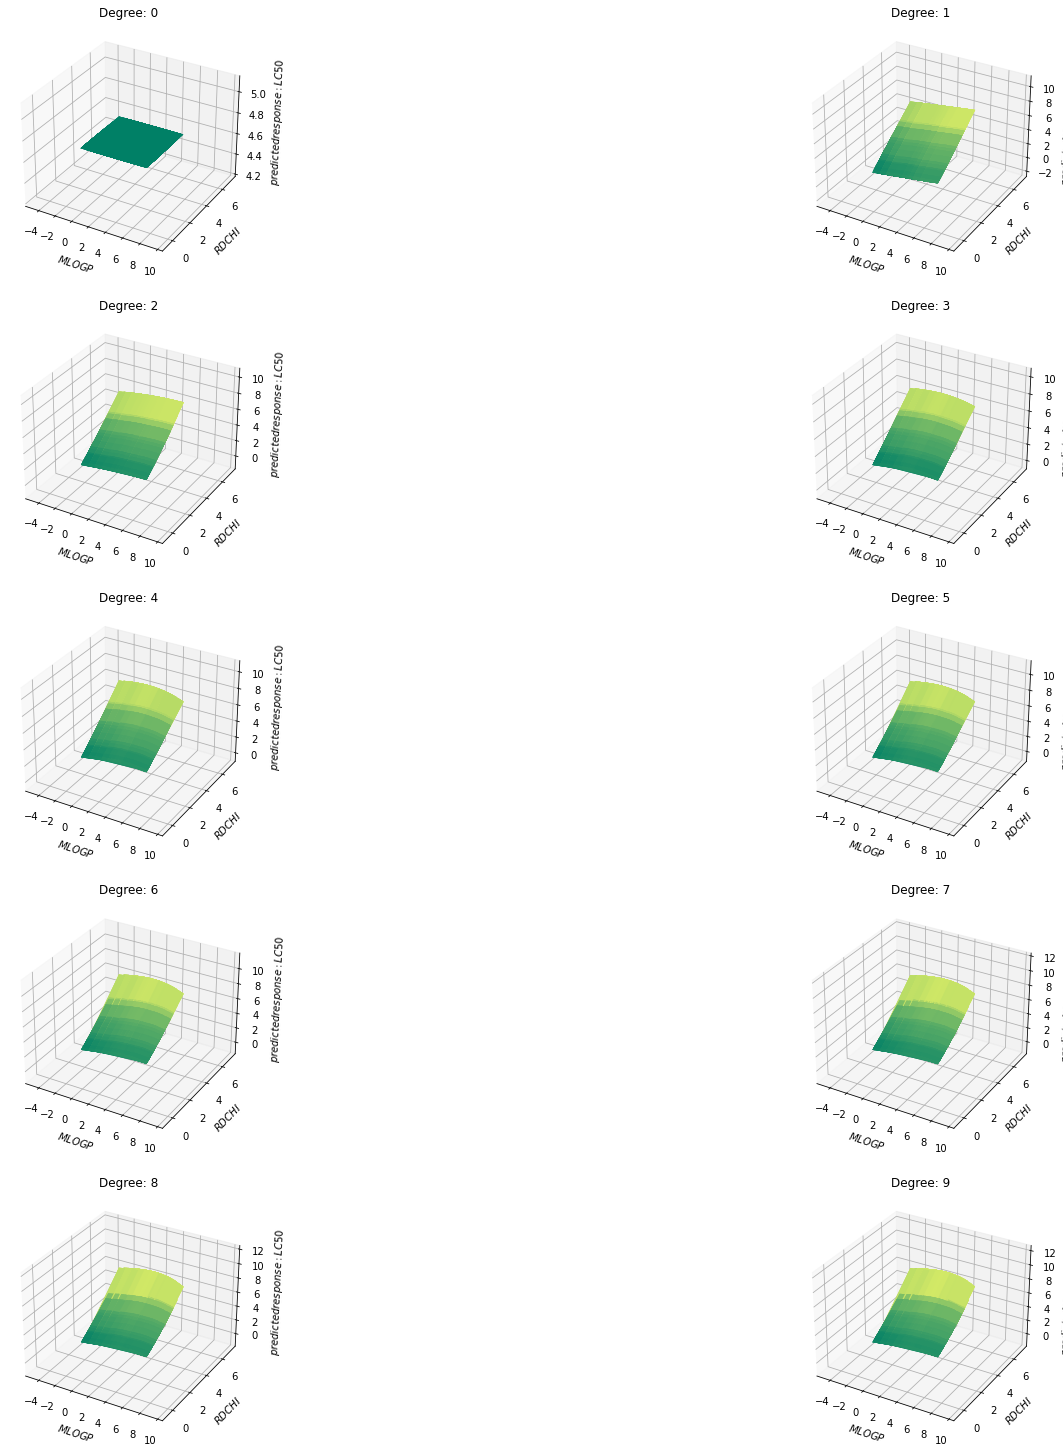

In [46]:
# Stochastic Gradient Descent Surface Plots
x1 = denormalize_datapoints(testing_x_comb[:,1], testing_t.size, 1)
x2 = denormalize_datapoints(testing_x_comb[:,2], testing_t.size, 2)

X1, X2 = np.meshgrid(x1, x2)

fig = plt.figure(figsize=(26,26))
for degree in range(10):
    ax = fig.add_subplot(5, 2, degree+1, projection ='3d')
    Z = np.dot(testing_x1_x2_comb, w_models_stochastic[degree]).reshape(X1.shape)    
    plt.title(f"Degree: {degree}")
    
    ax.plot_surface(X1, X2, Z, rstride=1, cstride=1, alpha=None, cmap='summer', antialiased=True)

    ax.set_xlabel('$MLOGP$')
    ax.set_ylabel('$RDCHI$')
    ax.set_zlabel('$predicted response: LC50$')

    ax.margins(0.5)

plt.show()

In [47]:
def calculate_error(t, x_comb, w, n):
    error = np.zeros(n, dtype=float)

    for i in range(n):
        differnce = t - np.dot(x_comb, np.transpose(w[i]))
        error[i] = np.sqrt(np.dot(np.transpose(differnce), differnce)/(t.size))

    return error

,Training Error,Testing Error
Degree,,
0,1.649978,1.720058
1,1.326912,1.454544
2,1.303711,1.421062
3,1.295793,1.423662
4,1.292796,1.427575
5,1.288618,1.428798
6,1.284971,1.428794
7,1.281408,1.430900
8,1.277834,1.432763


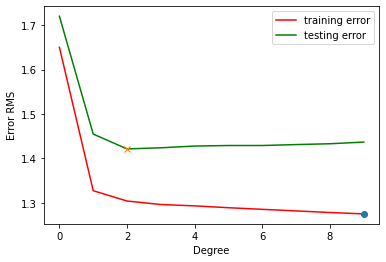

In [48]:
# Gradient Descent 
training_error = calculate_error(training_t, training_x_comb, w_models_gradient, 10)
testing_error = calculate_error(testing_t, testing_x_comb, w_models_gradient, 10)

degree = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

gradient_error = pd.DataFrame(data = np.transpose([training_error, testing_error]), index=degree, columns=['Training Error', 'Testing Error'])
gradient_error.index.names = ['Degree']

# Display error dataframe
display(gradient_error)

# Plotting both the error simultaneously
plt.plot(degree, training_error, color='r', label='training error')
plt.plot(degree, testing_error, color='g', label='testing error')
  
# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Degree")
plt.ylabel("Error RMS")

# Minimum index
training_ind = np.argmin(training_error)
testing_ind = np.argmin(testing_error)

plt.plot(training_ind, training_error[training_ind], marker='o')
plt.plot(testing_ind, testing_error[testing_ind], marker='x')
  
# Adding legend
plt.legend()
  
# To load the display window
plt.show()

,Training Error,Testing Error
Degree,,
0,1.650604,1.715173
1,1.326944,1.455049
2,1.316331,1.437479
3,1.303414,1.432355
4,1.300724,1.432961
5,1.302681,1.435349
6,1.299505,1.437230
7,1.299758,1.436148
8,1.299478,1.437851


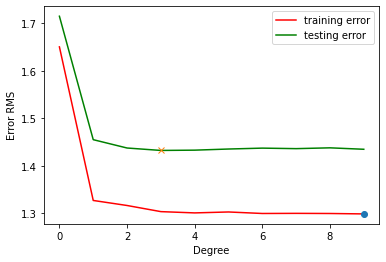

In [49]:
# Stochastic Gradient Descent 
training_error = calculate_error(training_t, training_x_comb, w_models_stochastic, 10)
testing_error = calculate_error(testing_t, testing_x_comb, w_models_stochastic, 10)

degree = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

stochastic_error = pd.DataFrame(data = np.transpose([training_error, testing_error]), index=degree, columns=['Training Error', 'Testing Error'])
stochastic_error.index.names = ['Degree']

# Display error dataframe
display(stochastic_error)

# Plotting both the error simultaneously
plt.plot(degree, training_error, color='r', label='training error')
plt.plot(degree, testing_error, color='g', label='testing error')
  
# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Degree")
plt.ylabel("Error RMS")

# Minimum index
training_ind = np.argmin(training_error)
testing_ind = np.argmin(testing_error)

plt.plot(training_ind, training_error[training_ind], marker='o')
plt.plot(testing_ind, testing_error[testing_ind], marker='x')
  
# Adding legend
plt.legend()
  
# To load the display window
plt.show()

B. 
Using the same dataset, we know that a polynomial regression model of degree 1 can 
be built by making use of the following generalized regularized error function:

![regularized_error_function](.\images\regularization_expression.jpg)

Build different regression models by taking q as 0.5,1,2,4.
Experiment with few values of λ to obtain the optimal model for each value of q.

In [50]:
training_x_comb = training_x_comb[:,:3]
testing_x_comb = testing_x_comb[:,:3]

In [51]:
q = [0.5, 1, 2, 4]
penalty = [0, 0.05, 1, 2.5]

w_models_regularized = np.zeros([4, 4, 3], dtype=float)

In [52]:
def penalty_vector(w, q, iter, penalty):
    vector = np.zeros(3, dtype=float)
    
    if iter != 0:
        for i in range(1,3):
            vector[i] = (penalty * q * w[i] * (abs(w[i])**(q-2)) * 0.5)

    return np.transpose(vector)

In [53]:
N = training_t.size

for i in range(4):
        for j in range(4):

                for iteration in range(100000):
                        y_pred = np.dot(training_x_comb, np.transpose(w_models_regularized[j][i]))
                        der = np.dot(np.transpose(training_x_comb), y_pred - training_t) + penalty_vector(w_models_regularized[j][i], q[j], iteration, penalty[i])
                        w_models_regularized[j][i] = np.transpose(np.transpose(w_models_regularized[j][i]) - (learning_rate)*(der))


for i in range(4):
        print(f"q: {q[i]}")
        
        for j in range(4):
                print(f"Penalty: {penalty[j]}  w = {w_models_regularized[i][j]}")


q: 0.5
Penalty: 0  w = [-0.08197052  7.12965876  2.62499727]
Penalty: 0.05  w = [-0.08145138  7.12905665  2.6243252 ]
Penalty: 1  w = [-0.07157773  7.11761817  2.61151617]
Penalty: 2.5  w = [-0.05594941  7.0995651   2.59113432]
q: 1
Penalty: 0  w = [-0.08197052  7.12965876  2.62499727]
Penalty: 0.05  w = [-0.07929484  7.12571638  2.62326093]
Penalty: 1  w = [-0.0284569   7.05081112  2.59027058]
Penalty: 2.5  w = [0.05181354 6.93253965 2.53818056]
q: 2
Penalty: 0  w = [-0.08197052  7.12965876  2.62499727]
Penalty: 0.05  w = [-0.04549124  7.06400453  2.62583484]
Penalty: 1  w = [0.54250999 6.02566652 2.59830897]
Penalty: 2.5  w = [1.19716443 4.91684714 2.47044754]
q: 4
Penalty: 0  w = [-0.08197052  7.12965876  2.62499727]
Penalty: 0.05  w = [1.10738739 4.88090925 2.87502659]
Penalty: 1  w = [2.74216739 2.38101395 2.00190574]
Penalty: 2.5  w = [3.15450263 1.83289229 1.61199962]


q: 0.5


,Training Error,Testing Error
Penalty,,
0.00,1.326912,1.454544
0.05,1.326912,1.454536
1.00,1.326915,1.454391
2.50,1.326930,1.454172


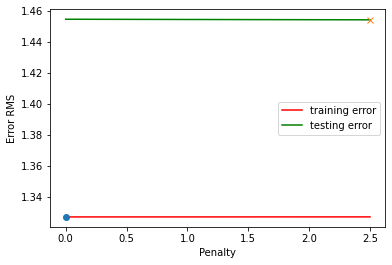

q: 1


,Training Error,Testing Error
Penalty,,
0.00,1.326912,1.454544
0.05,1.326912,1.454495
1.00,1.326961,1.453600
2.50,1.327218,1.452378


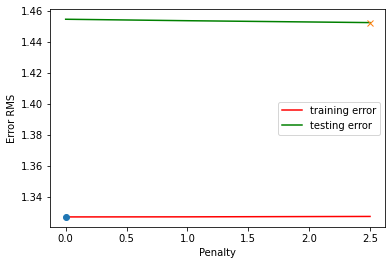

q: 2


,Training Error,Testing Error
Penalty,,
0.00,1.326912,1.454544
0.05,1.326932,1.453750
1.00,1.332696,1.446368
2.50,1.350971,1.450646


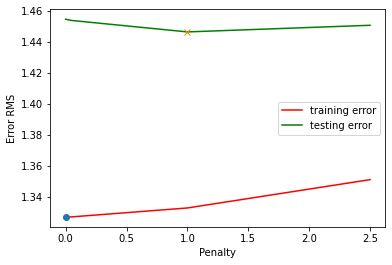

q: 4


,Training Error,Testing Error
Penalty,,
0.00,1.326912,1.454544
0.05,1.348767,1.446572
1.00,1.441158,1.512540
2.50,1.477301,1.546085


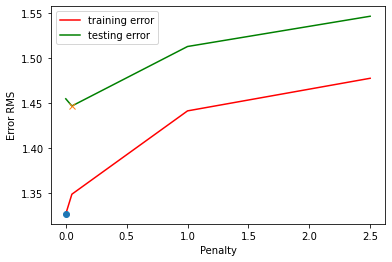

In [54]:
regularized_error = [None]*4

for i in range(4):
    print(f"q: {q[i]}")

    # Regularization 
    training_error = calculate_error(training_t, training_x_comb, w_models_regularized[i], 4)  
    testing_error = calculate_error(testing_t, testing_x_comb, w_models_regularized[i], 4)

    regularized_error[i] = pd.DataFrame(data = np.transpose([training_error, testing_error]), index=penalty, columns=['Training Error', 'Testing Error'])
    regularized_error[i].index.names = ['Penalty']

    # Display error dataframe
    display(regularized_error[i])

    # Plotting both the error simultaneously
    plt.plot(penalty, training_error, color='r', label='training error')
    plt.plot(penalty, testing_error, color='g', label='testing error')
    
    # Naming the x-axis, y-axis and the whole graph
    plt.xlabel("Penalty")
    plt.ylabel("Error RMS")

    # Minimum index
    training_ind = np.argmin(training_error)
    testing_ind = np.argmin(testing_error)

    plt.plot(penalty[training_ind], training_error[training_ind], marker='o')
    plt.plot(penalty[testing_ind], testing_error[testing_ind], marker='x')
    
    # Adding legend
    plt.legend()
    
    # To load the display window
    plt.show()

In [55]:
testing_x1_x2 = np.dstack(np.meshgrid(testing_x_comb[:,1], testing_x_comb[:,2])).reshape(-1, 2)
testing_x1_x2 = np.c_[np.ones((testing_x1_x2.size)//2, dtype=float), testing_x1_x2]

print(testing_x1_x2)

[[1.         0.78523791 0.35484464]
 [1.         0.42548416 0.35484464]
 [1.         0.68750802 0.35484464]
 ...
 [1.         0.62665128 0.29674573]
 [1.         0.74458125 0.29674573]
 [1.         0.59670386 0.29674573]]


q: 0.5


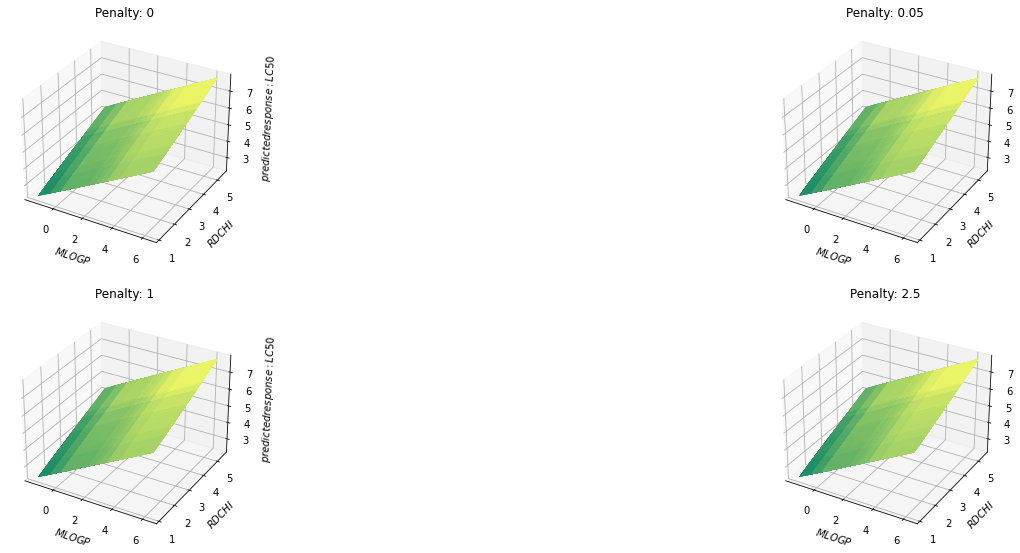

q: 1


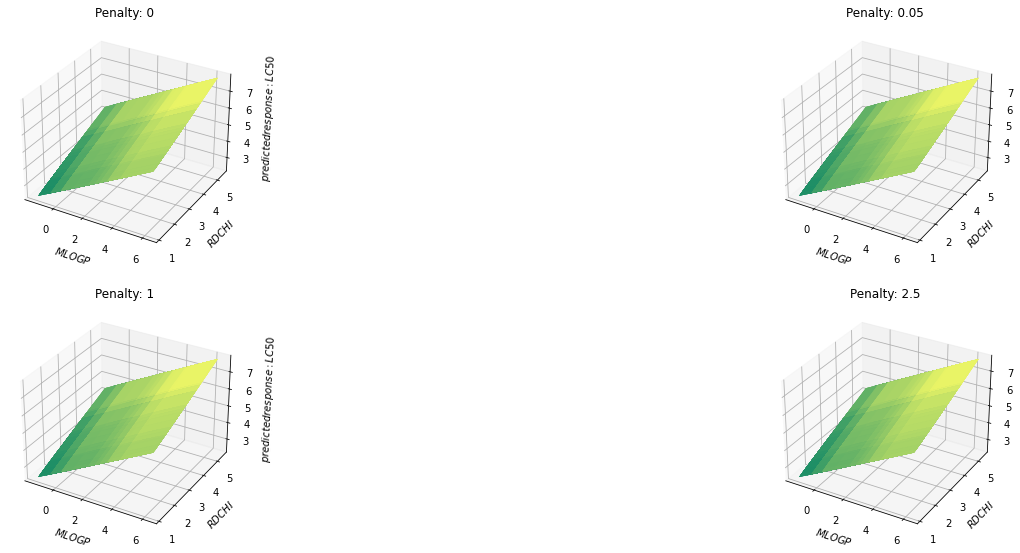

q: 2


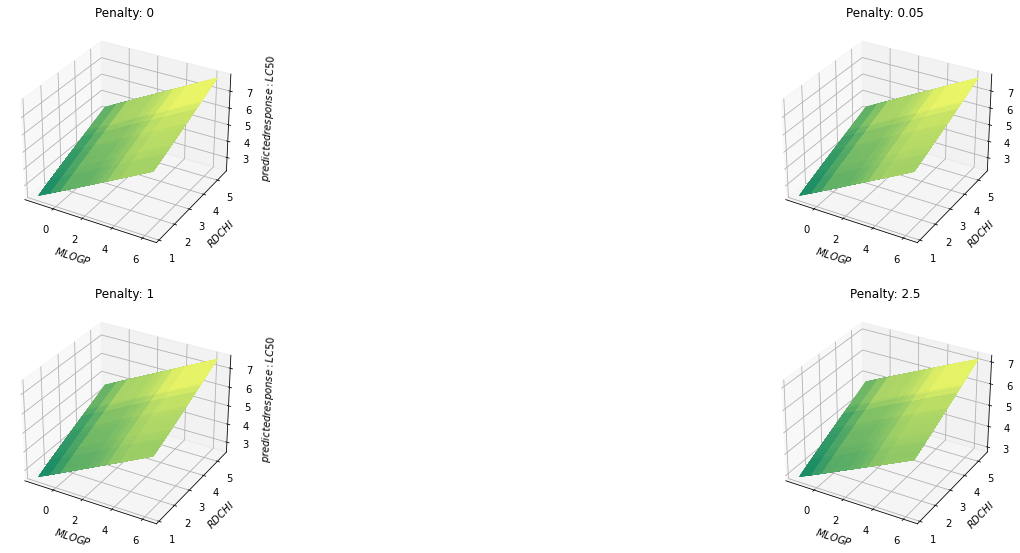

q: 4


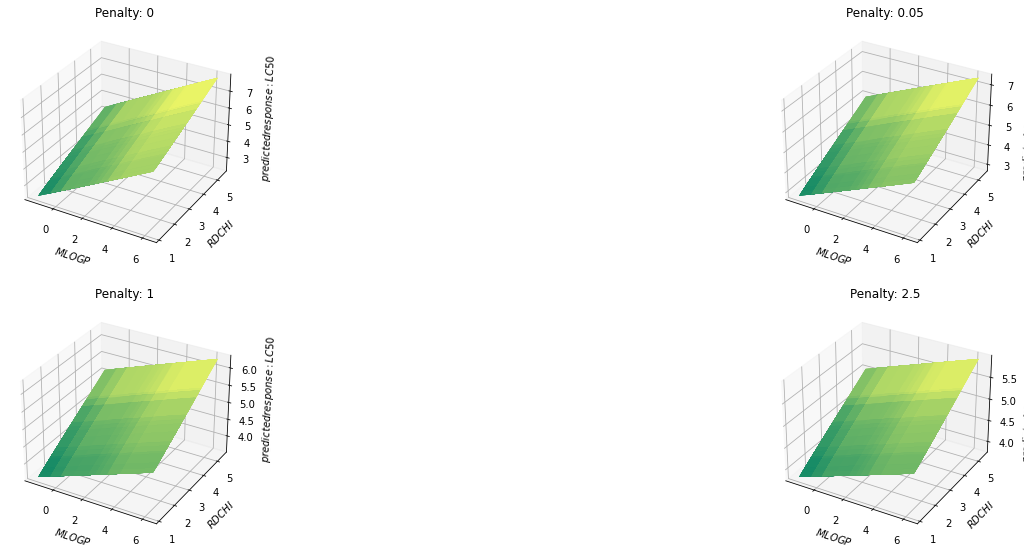

In [56]:
for i in range(4):
    print(f"q: {q[i]}")
    x1 = denormalize_datapoints(testing_x_comb[:,1], testing_t.size, 1)
    x2 = denormalize_datapoints(testing_x_comb[:,2], testing_t.size, 2)

    X1, X2 = np.meshgrid(x1, x2)

    fig = plt.figure(figsize=(25,25))

    for j in range(4):
        ax = fig.add_subplot(5, 2, j+1, projection ='3d')
        Z = np.dot(testing_x1_x2, w_models_regularized[i][j]).reshape(X1.shape)    
        plt.title(f"Penalty: {penalty[j]}")
        
        ax.plot_surface(X1, X2, Z, rstride=1, cstride=1, alpha=None, cmap='summer', antialiased=True)

        ax.set_xlabel('$MLOGP$')
        ax.set_ylabel('$RDCHI$')
        ax.set_zlabel('$predicted response: LC50$')

    plt.show()

C.
Perform a comparative study of the four optimal regularized regression models and 
classical regression model (best model obtained in (a) ).

In [57]:
# Minimum testing error of Gradient Descent
display(gradient_error[gradient_error['Testing Error'] == gradient_error['Testing Error'].min()])

,Training Error,Testing Error
Degree,,
2,1.303711,1.421062


In [58]:
# Minimum testing error for each value of q

for i in range(4):
    print(f"q = {q[i]}")

    display(regularized_error[i][regularized_error[i]['Testing Error'] == regularized_error[i]['Testing Error'].min()])

q = 0.5


,Training Error,Testing Error
Penalty,,
2.5,1.32693,1.454172


q = 1


,Training Error,Testing Error
Penalty,,
2.5,1.327218,1.452378


q = 2


,Training Error,Testing Error
Penalty,,
1.0,1.332696,1.446368


q = 4


,Training Error,Testing Error
Penalty,,
0.05,1.348767,1.446572


| Model | Training Error (RMS) | Testing Error (RMS) |
| :-: | :-: | :-: |
| Degree 2 | 1.303711 | 1.421062 |
| Regularized (q = 0.5, penalty = 2.5) | 1.32693 | 1.454172 |
| Regularized (q = 1, penalty = 2.5) | 1.327218 | 1.452378 |
| Regularized (q = 2, penalty = 1.0) | 1.332696 | 1.446368 |
| Regularized (q = 4, penalty = 0.05) | 1.348767 | 1.446572 |

By comparing the testing errors, we determine that the classical regression model of degree 2 is more accurate than the four regularised models for the values of λ at which the respective regularised models produce most accurate result.

This can be due to the fact that degree 2 is the most accurate in classical regression which corresponds to the fact that degree 1 is underfitting the data and hence regularizing it constraints the value of w1 and w2 even further leading to a even more underfitted model.

## Assignment 1-C Visualizing Regularization

• Aquatic toxicity caused due to manufactured chemicals and other anthropogenic and 
natural materials severely affects aquatic organisms at various levels of organization. 
The dataset consists of 2 molecular descriptors: MLOGP (𝑥1) and GATS1i (𝑥2) which 
affect the LC50 value (t) (quantitative experimental response). 

• Dataset Link: 
https://drive.google.com/file/d/1nfA1Qet7qOR46tWCGnFR2oHwzWSV-0nO/view?usp=sharing

• Consider the optimization problem

![optimization_problem](./images/optimization_problem.jpg)

• Plot the contours of the error function (unregularized) and the constraint regions for q = 
0.5, 1, 2 and 4 (Refer to Fig 3.4 of textbook) and 𝜂 = 1.4, 0.1, 0.035 and 0.052 
respectively. Make a plot of error function contours. Also make plots of the constraint 
regions and error function contours, showing the tangential contour where the minima 
occurs. Indicate the values of 𝑤1, 𝑤2 at the point of intersection of the tangential contour 
and the constraint region for which the global minima will be obtained. 

In [59]:
def error_function(W1, W2, t, x1, x2, n):

    error_matrix = np.zeros((n, n), dtype = float)

    for i in range(n):
        for j in range(n):
            A = t - W1[i][j]*x1 - W2[i][j]*x2
            error_matrix[i][j] = (A.T @ A)/2
            
    return error_matrix

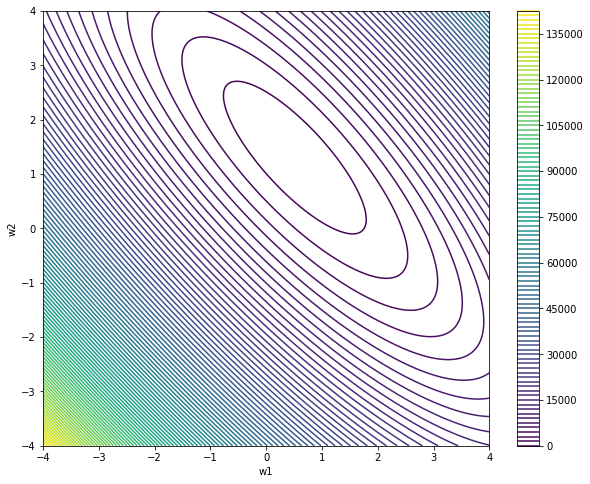

In [60]:
x1 = training_data[:,0]
x2 = training_data[:,1]
t = training_data[:,2]

n = 1000

w1 = np.linspace(-4, 4, n)
w2 = np.linspace(-4, 4, n)

W1, W2 = np.meshgrid(w1, w2)

E = error_function(W1, W2, t, x1, x2, n)

plt.figure(figsize=(10,8))
plt.xlabel('w1')
plt.ylabel('w2')
plt.contour(W1, W2, E, 100)   
plt.colorbar()
plt.show()

In [61]:
q = np.array([0.5, 1, 2, 4])
eta = np.array([1.4, 0.1, 0.035, 0.052])
ticks = np.array([24, 21, 21, 21])

In [62]:
def constraint(w1, w2, c):
    return (w1 ** q[c]) + (w2 ** q[c])

def constraint_function(W1, W2, c):

    constraint_matrix = np.zeros((n, n), dtype = float)

    for i in range(n):
        for j in range(n):
            constraint_matrix[i][j] = constraint(W1[i][j], W2[i][j], c)
            
    return constraint_matrix

In [63]:
def constraint_small(w1, w2, c):
    return (abs(w1) ** q[c]) + (abs(w2) ** q[c])

def constraint_function_small(W1, W2, c):

    constraint_matrix = np.zeros((n, n), dtype = float)

    for i in range(n):
        for j in range(n):
            constraint_matrix[i][j] = constraint_small(W1[i][j], W2[i][j], c)
            
    return constraint_matrix

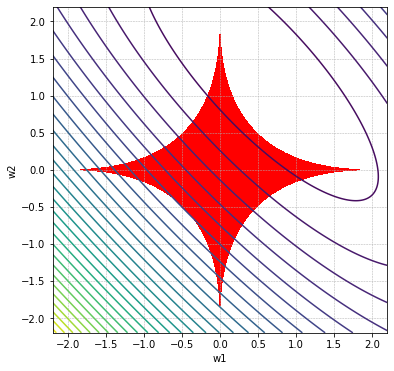

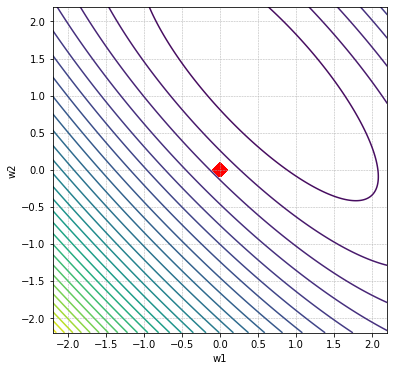

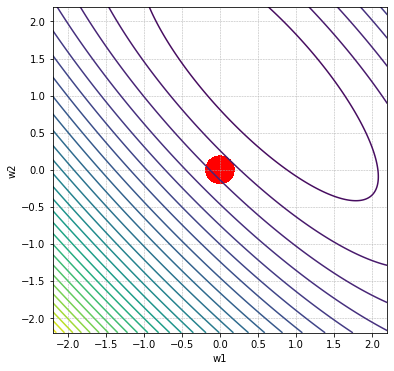

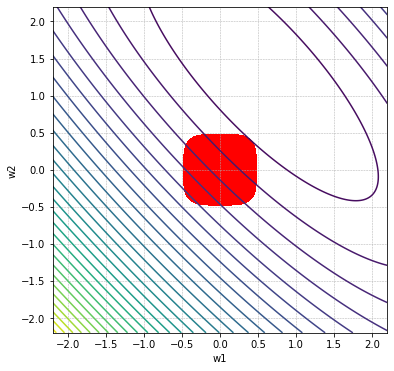

In [64]:
w1 = np.linspace(-2.2, 2.2, n)
w2 = np.linspace(-2.2, 2.2, n)

W1, W2 = np.meshgrid(w1, w2)

E = error_function(W1, W2, t, x1, x2, n)

for i in range(4):

    plt.figure(figsize=(6, 6))

    plt.xticks(np.linspace(-2.5, 2.5, 11))
    plt.yticks(np.linspace(-2.5, 2.5, 11))

    plt.xlabel('w1')
    plt.ylabel('w2')

    plt.grid(linestyle = '--', linewidth = 0.5)

    C = constraint_function_small(W1, W2, i)
    plt.contourf(W1, W2, C, [0, eta[i]], colors = 'r')

    error_plot = plt.contour(W1, W2, E, 28)

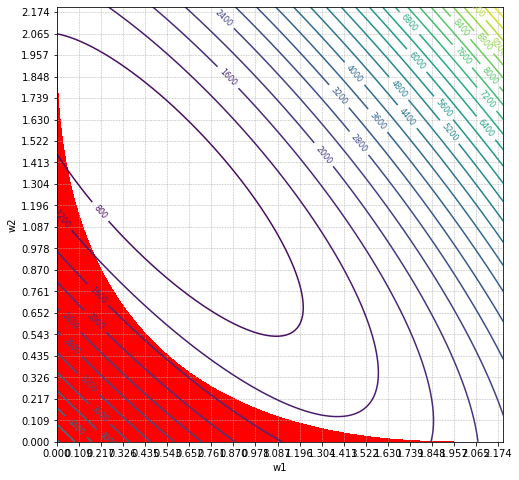

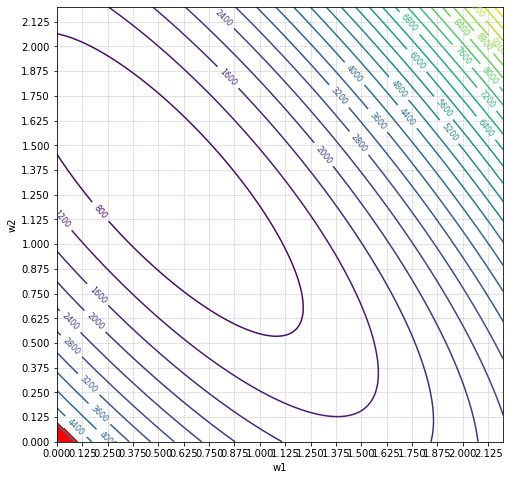

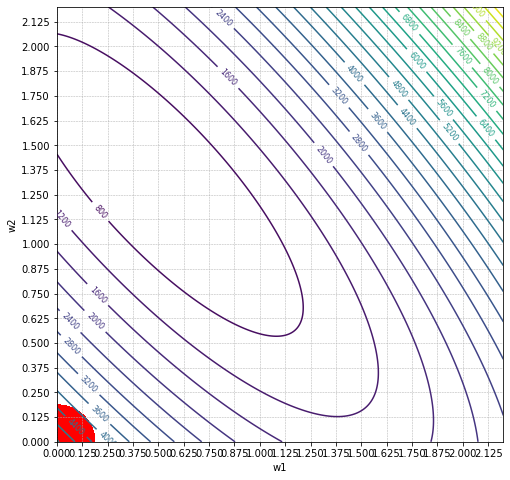

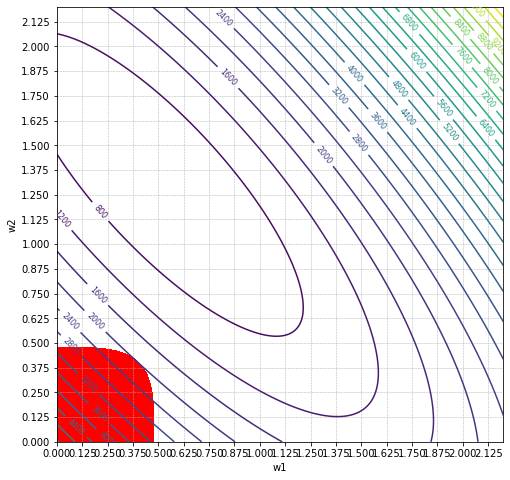

In [65]:
w1 = np.linspace(0, 2.2, n)
w2 = np.linspace(0, 2.2, n)

W1, W2 = np.meshgrid(w1, w2)

E = error_function(W1, W2, t, x1, x2, n)

for i in range(4):

    plt.figure(figsize=(8, 8))

    plt.xticks(np.linspace(0, 2.5, ticks[i]))
    plt.yticks(np.linspace(0, 2.5, ticks[i]))

    plt.xlabel('w1')
    plt.ylabel('w2')

    plt.grid(linestyle = '--', linewidth = 0.5)

    C = constraint_function(W1, W2, i)
    plt.contourf(W1, W2, C, [0, eta[i]], colors = 'r')

    error_plot = plt.contour(W1, W2, E, 28)
    plt.clabel(error_plot, error_plot.levels, inline = True, fontsize = 8)

The values of w1 and w2 obtained from the above graphs are:

| No. | q | eta | w1 | w2 |
| :-: | :-: | :-: | :-: | :-: |
| 1 | 0.5 | 1.4 | 0.0066 | 1.7391 |
| 2 | 1 | 0.1 | 0.0938 | 0.0063 |
| 3 | 2 | 0.035 | 0.1323 | 0.1323 |
| 4 | 4 | 0.052 | 0.3966 | 0.4063 |

In [66]:
def calculate_error_critical(w1, w2, x1, x2, t):
    A = t - w1*x1 - w2*x2
    error = (A.T @ A) / t.size
    return error

In [67]:
w1_critical = ([0.0066, 0.0938, 0.1323, 0.3966])
w2_critical = ([1.7391, 0.0063, 0.1323, 0.4063])
error_critical_training = np.zeros(4, dtype=float)

for i in range(4):
    error_critical_training[i] = calculate_error_critical(w1_critical[i], w2_critical[i], x1, x2, t)

The values of Mean Square Error obtained from training data are:

| No. | w1 | w2 | Mean Square Error |
| :-: | :-: | :-: | :-: |
| 1 | 0.0066 | 1.7391 | 3.05851887 |
| 2 | 0.0938 | 0.0063 | 21.85280389 |
| 3 | 0.1323 | 0.1323 | 18.28542177 |
| 4 | 0.3966 | 0.4063 | 9.1959121 |

In [68]:
x1 = testing_data[:,0]
x2 = testing_data[:,1]
t = testing_data[:,2]

error_critical_testing = np.zeros(4, dtype=float)
for i in range(4):
    error_critical_testing[i] = calculate_error_critical(w1_critical[i], w2_critical[i], x1, x2, t)

The values of Mean Square Error obtained from testing data are:

| No. | w1 | w2 | Mean Square Error |
| :-: | :-: | :-: | :-: |
| 1 | 0.0066 | 1.7391 | 2.8034597 |
| 2 | 0.0938 | 0.0063 | 23.01359021 |
| 3 | 0.1323 | 0.1323 | 19.26195 |
| 4 | 0.3966 | 0.4063 | 9.65198418 |